# 教師なし学習(Non supervised learning)

「教師なし」とは正解データを与えない機械学習の分類方法のこと。

代表例：

- k平均法(k-means法, k-means clustering)
- k近傍法(k-NN, k-nearest neighbor)
- 主成分分析(PCA, Principal Component Analysis)

目次：

クラスタリング
- k平均法(k-means)
  - エルボー法
  - シルエット法
- k近傍法(k-NN)
- DBSCAN(密度準拠クラスタリング)

主成分分析(PCA)
- 主成分分析(PCA, Principal Component Analysis)
- カーネル主成分分析

## k平均法(k-means)

ランダムに

squared Euclidean distance


<figure>
    <img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/157588628790018.gif" alt="k-means">
    <caption><center>「k-means法」でクラスタリングする様子</center></caption>
</figure>

### k-means++法


In [4]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# irisデータの読み込み
iris = load_iris()

In [5]:
# K-meansをするためのインスタンスを作成。今回はクラスター数を3とする
iris_kmeans = KMeans(n_clusters=3)
# 作ったインスタンスにfitメソッドでデータを渡すだけ
iris_kmeans.fit(iris.data)

KMeans(n_clusters=3)

In [6]:
labels = iris_kmeans.predict(iris.data)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


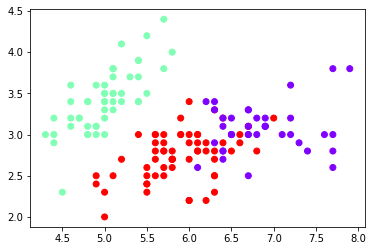

In [7]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels, cmap="rainbow")
plt.show()

### エルボー法


## DBSCAN(Density-based spatial clustering of applications with noise)

ある半径の内側に点がいくつあるか（密度）によってその領域をクラスタとして判断する。

その領域の周辺の密度があるしきい値を超えている限りは、クラスタを成長させ続け、一方、ある半径内の近くに点がない場合、その点はノイズとして捉える。

互いに密に詰まっている点は同じグループにクラスタリングし、密度の低い領域にある点は外れ値（ノイズ）として捉える。

[DBSCANクラスタリングの解説と実験](https://data-analysis-stats.jp/python/dbscan%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%BC%E3%81%AE%E8%A7%A3%E8%AA%AC%E3%81%A8%E5%AE%9F%E9%A8%93/)

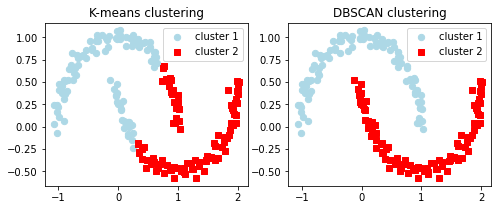

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# 月型のデータを生成
X, Y = make_moons(n_samples=200, noise=0.05, random_state=0)

# グラフと2つの軸を定義 左のax1はk-means法用、右のax2はDBSCAN用
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# k-means法
km = KMeans(n_clusters=2, random_state=0)
Y_km = km.fit_predict(X)

ax1.scatter(X[Y_km == 0, 0], X[Y_km == 0, 1], c="lightblue",
            marker="o", s=40, label="cluster 1")
ax1.scatter(X[Y_km == 1, 0], X[Y_km == 1, 1], c="red",
            marker="s", s=40, label="cluster 2")
ax1.set_title("K-means clustering")
ax1.legend()

# DBSCANでクラスタリング
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
Y_db = db.fit_predict(X)

ax2.scatter(X[Y_db == 0, 0], X[Y_db == 0, 1], c="lightblue",
            marker="o", s=40, label="cluster 1")
ax2.scatter(X[Y_db == 1, 0], X[Y_db == 1, 1], c="red",
            marker="s", s=40, label="cluster 2")
ax2.set_title("DBSCAN clustering")
ax2.legend()
plt.show()